# 1. Import Necessary Library

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Library requests untuk request/mengakses web yang akan discrapping.
* Library bs4 dan mengimpor BeautifulSoup untuk melakukan scrapping.
* Library pandas untuk membuat dataframe data Date & Volume dari Ethereum yang telah discrapping.
* Library seaborn dan matplotlib untuk plot pergerakan volume perdagangan dari Ethereum.

# 2. Request & Scrapping Data

In [3]:
get_url = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data?start_date=2022-01-01&end_date=2023-03-29#panel')
get_url.content[:500]

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

> Melakukan request pada web Ethereum dengan `requests.get()` yang disimpan pada variabel `get_url`, lalu melihat isi/konten dari web yang direquest dan hanya ingin melihat 500 karakter saja.

In [4]:
soup = BeautifulSoup(get_url.content, 'html.parser')

> Menggunakan fungsi `BeautifulSoup()` untuk melakukan scrapping data yang konten/isinya adalah `get_url.content` dan `'html.parser'` agar dapat scrapping data pada web HTML dengan mudah dan efisien.

In [5]:
table = soup.find('tbody', attrs={'data-target':'historical.tableBody'})
print(table.prettify()[:500])

<tbody data-target="historical.tableBody">
 <tr>
  <th class="font-semibold text-center" scope="row">
   2023-03-29
  </th>
  <td class="text-center">
   $213,909,228,255
  </td>
  <td class="text-center">
   $9,548,011,564
  </td>
  <td class="text-center">
   $1,776.04
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2023-03-28
  </th>
  <td class="text-center">
   $206,685,090,341
  </td>
  <td class="text-center">
   $9,75


> Melakukan pencarian data menggunakan `soup.find()` yang terdapat `tbody` dan `{'data-target':'historical.tableBody'}` pada parameter `soup.find()` karena mengacu pada bagian HTML `<tbody data-target="historical.tableBody">`.

In [6]:
table.find_all('th', attrs={'scope':'row', 'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2023-03-29</th>,
 <th class="font-semibold text-center" scope="row">2023-03-28</th>,
 <th class="font-semibold text-center" scope="row">2023-03-27</th>,
 <th class="font-semibold text-center" scope="row">2023-03-26</th>,
 <th class="font-semibold text-center" scope="row">2023-03-25</th>]

In [7]:
table.find_all('th', attrs={'scope':'row', 'class':'font-semibold text-center'})[0].text

'2023-03-29'

In [8]:
table.find_all('td', attrs={'class':'text-center'})[:5]

[<td class="text-center">
 $213,909,228,255
 </td>,
 <td class="text-center">
 $9,548,011,564
 </td>,
 <td class="text-center">
 $1,776.04
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $206,685,090,341
 </td>]

In [9]:
table.find_all('td', attrs={'class':'text-center'})[0].text

'\n$213,909,228,255\n'

In [10]:
table.find_all('td', attrs={'class':'text-center'})[1].text.strip()

'$9,548,011,564'

> Melakukan `table.find_all()` untuk mencari value/nilai yang mana dalam kasus ini mencari nilai/value pada suatu kolom tertentu.

In [11]:
list_tanggal = []
row_length = len(table.find_all('th', attrs={'scope':'row', 'class':'font-semibold text-center'}))
print("Banyak Data Tanggal:", row_length,"\n")

for i in range(0, row_length):
    tanggal = table.find_all('th', attrs={'scope':'row', 'class':'font-semibold text-center'})[i].text
    list_tanggal.append(tanggal)
    
print(list_tanggal)

Banyak Data Tanggal: 60 

['2023-03-29', '2023-03-28', '2023-03-27', '2023-03-26', '2023-03-25', '2023-03-24', '2023-03-23', '2023-03-22', '2023-03-21', '2023-03-20', '2023-03-19', '2023-03-18', '2023-03-17', '2023-03-16', '2023-03-15', '2023-03-14', '2023-03-13', '2023-03-12', '2023-03-11', '2023-03-10', '2023-03-09', '2023-03-08', '2023-03-07', '2023-03-06', '2023-03-05', '2023-03-04', '2023-03-03', '2023-03-02', '2023-03-01', '2023-02-28', '2023-02-27', '2023-02-26', '2023-02-25', '2023-02-24', '2023-02-23', '2023-02-22', '2023-02-21', '2023-02-20', '2023-02-19', '2023-02-18', '2023-02-17', '2023-02-16', '2023-02-15', '2023-02-14', '2023-02-13', '2023-02-12', '2023-02-11', '2023-02-10', '2023-02-09', '2023-02-08', '2023-02-07', '2023-02-06', '2023-02-05', '2023-02-04', '2023-02-03', '2023-02-02', '2023-02-01', '2023-01-31', '2023-01-30', '2023-01-29']


> Melakukan iterasi dari 0 sampai panjang baris data `Date`, yaitu sampai 60 dan dimasukkan ke dalam list `list_tanggal`

In [12]:
increment = 1
list_volume = []
while len(list_volume) != 60:
    volume = table.find_all('td', attrs={'class':'text-center'})[increment].text.strip()
    list_volume.append(volume)
    increment += 4

print("Banyak Data Volume:",len(list_volume),"\n")
print(list_volume)

Banyak Data Volume: 60 

['$9,548,011,564', '$9,757,415,238', '$8,417,258,785', '$8,023,849,174', '$11,601,017,882', '$10,980,967,035', '$13,820,716,100', '$10,831,022,955', '$12,973,595,973', '$10,745,813,975', '$11,976,182,095', '$14,459,727,611', '$30,201,930,395', '$17,257,648,020', '$19,833,762,798', '$65,211,714,925', '$13,967,891,188', '$18,345,198,261', '$14,696,381,617', '$10,861,201,441', '$11,881,879,819', '$8,523,808,477', '$6,627,693,314', '$62,172,854,406', '$4,800,994,312', '$11,179,316,252', '$7,930,395,056', '$8,672,222,866', '$6,883,711,562', '$7,916,573,299', '$6,357,994,998', '$6,117,521,125', '$9,609,840,835', '$9,698,749,202', '$9,836,391,622', '$9,728,814,194', '$8,435,810,846', '$7,499,517,187', '$5,863,446,679', '$10,807,323,084', '$13,388,835,215', '$11,079,231,384', '$11,723,184,974', '$11,573,812,956', '$6,128,794,710', '$6,070,233,326', '$9,882,779,900', '$12,447,757,846', '$8,766,845,417', '$9,180,247,306', '$7,825,100,535', '$8,211,226,952', '$6,766,208,8

> Melakukan iterasi ketika panjang `list_volume` tidak sama dengan 60 (karena ingin menyamakan dengan `list_tanggal`). Melakukan iterasi dari 1 karena index value kolom `volume` awal adalah index 1. Setelah memasukkan nilai volume ke `list_volume`, iterasi selalu ditambah 4 karena nilai volume adalah indexnya selalu ditambah 4 jika dicocokkan pada tabel websitenya.

# 3. Data Wrangling & Visualization

In [13]:
df = pd.DataFrame({"Date":list_tanggal, "Volume ($)":list_volume})
df.head()

,Date,Volume ($)
0,2023-03-29,"$9,548,011,564"
1,2023-03-28,"$9,757,415,238"
2,2023-03-27,"$8,417,258,785"
3,2023-03-26,"$8,023,849,174"
4,2023-03-25,"$11,601,017,882"


> Membuat dataframe dari hasil scrapping `Date` dan `Volume` yang telah dilakukan sebelumnya

In [14]:
df.dtypes

Date          object
Volume ($)    object
dtype: object

> Tipe data awal adalah keduanya sama-sama object

In [15]:
df["Date"] = pd.to_datetime(df["Date"])
df["Volume ($)"] = df["Volume ($)"].str.replace("$", "")
df["Volume ($)"] = df["Volume ($)"].str.replace(",", "")
df["Volume ($)"] = df["Volume ($)"].astype('int64')

C:\Users\logar\AppData\Local\Temp\ipykernel_9860\1798276861.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Volume ($)"] = df["Volume ($)"].str.replace("$", "")


* Mengganti tipe data kolom `Date` ke tipe data `datetime`
* Menghapus tanda dollar dan tanda koma pada nilai kolom `Volume ($)` lalu mengubahnya menjadi tipe data integer

In [16]:
df.head()

,Date,Volume ($)
0,2023-03-29,9548011564
1,2023-03-28,9757415238
2,2023-03-27,8417258785
3,2023-03-26,8023849174
4,2023-03-25,11601017882


In [17]:
df.dtypes

Date          datetime64[ns]
Volume ($)             int64
dtype: object

> Tipe data kolom `Date` dan `Volume ($)` telah berhasil diubah

In [18]:
df = df.sort_values("Date")
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Volume ($)
0,2023-01-29,6523949725
1,2023-01-30,10037370816
2,2023-01-31,10977781768
3,2023-02-01,7544090212
4,2023-02-02,9295116916


> Melakukan sort dataframe sesuai dengan kolom `Date` untuk melakukan line plot yang menunjukkan plot data time series.

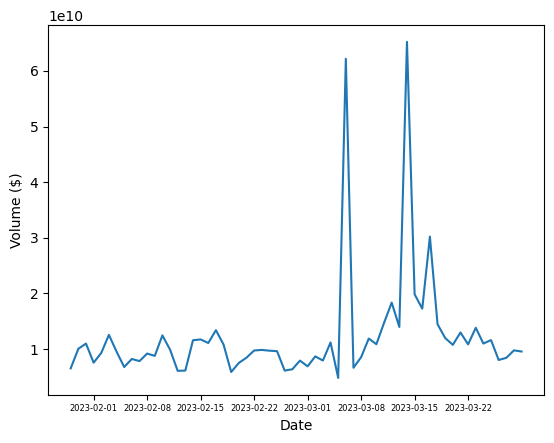

In [19]:
sns.lineplot(data=df, x="Date", y="Volume ($)")
plt.xticks(fontsize=6)
plt.show()

> Line plot dengan sumbu x adalah kolom `Date` dan sumbu y adalah kolom `Volume ($)` dan mengatur ukuran xlabel dengan `plt.xticks()` karena jika tidak diatur labelnya bertabrakan jadi tidak rapi.

# 4. Conclusion

* Dari sebelum tanggal `2023-02-01` sampai pertengahan tanggal `2023-03-1 dan 2023-03-08` dan pada pertengahan tanggal `2023-03-15 dan 2023-03-22` sampai tanggal lebih dari `2023-03-22` terjadi kenaikan dan penurunan volume perdagangan yang cukup konstan.
* Terjadi peningkatan dan penurunan volume perdagangan yang signifikan pada pertengahan tanggal `2023-03-01 dan 2023-03-08` dan pada pertengahan tanggal `2023-03-08 dan pertengahan 2023-03-15` sampai pertengahan tanggal `2023-03-15 dan pertengahan 2023-03-22`.